<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Cross_validations_Mini_Batch_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment with MiniBatches**


In [7]:
#Import libraries
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader,TensorDataset


In [8]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#convert data to tensor
data=torch.tensor(iris[iris.columns[0:4]].values).float()

#Create labels & convert in numeric
labels=torch.zeros(len(data),dtype=torch.long)
#iris.species.unique()
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2
#labels

In [10]:
#Split Train & Test data
train_data, test_data, train_label, test_label = train_test_split(data, labels, train_size=.8)

#Convert train & Test data to Pytorch Tensolr...get features & targets together
train_data=TensorDataset(train_data,train_label)
test_data=TensorDataset(test_data,test_label)



In [11]:

#############Create a Model
def createNewModel():
  #Model Architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3),
  )

  #Define Loss function
  lossfunc=nn.CrossEntropyLoss()
  #Define Optimizer
  optimizer=torch.optim.SGD(ANNiris.parameters(),lr=.001)

  #return
  return ANNiris,lossfunc,optimizer

In [12]:
###################Train te Model


###Global Parameters
numepochs=500

###Train the Model- Create a function
def trainModel():

  ##Intialize Accuracies for the epoch- each epoch only
  trainacc=[]
  testacc=[]
  losses=[]

  # Perform each Epoch- First Loop

  for epochi in range(numepochs):
    #Activate training Mode
    ANNiris.train()

    #Loop for each Batches- Second Loop
    batchacc=[] # accuracy for each batch
    for X,y in train_loader:

      #foorward pass
      yHat=ANNiris(X)

      #calculate loss
      loss=lossfunc(yHat,y)

      
      #backpropos
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #Bath accuracy
      batchacc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())

      #End of batch Loop


    #Avarage training accuracy of all bacthes...we are in for loop ---out of batch loop
    trainacc.append(np.mean(batchacc))

    ##In each epoch calculate test accuracy
      

    #feedforward for test data which is in only one batch..devide data from test loader in test-features and test_targets
    X,y=next(iter(test_loader))
    ANNiris.eval()
    with torch.no_grad(): #deactivate gradient related calculations..run model faster
      #predlabels=torch.argmax(ANNiris(X),axis=1)
      testacc.append(100*torch.mean((torch.argmax(ANNiris(X),axis=1)==y).float()).item())

  #Return Accuracies
  return trainacc,testacc













In [14]:
###range of Batch sizes
batchsize= 2**np.arange(1,7)

#Intialize output result matrices
AccuracyResultTrain=np.zeros((numepochs,len(batchsize)))
AccuracyResultTest=np.zeros((numepochs,len(batchsize)))

#Test loader
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

#Train Loader

for bi in range(len(batchsize)):
  train_loader=DataLoader(train_data,batch_size=int(batchsize[bi]),shuffle=True,drop_last=True)

  #Create Model
  ANNiris,lossfunc,optimizer=createNewModel()
  trainacc,testacc=trainModel()

  #Store data
  AccuracyResultTrain[:,bi]=trainacc
  AccuracyResultTest[:,bi]=testacc



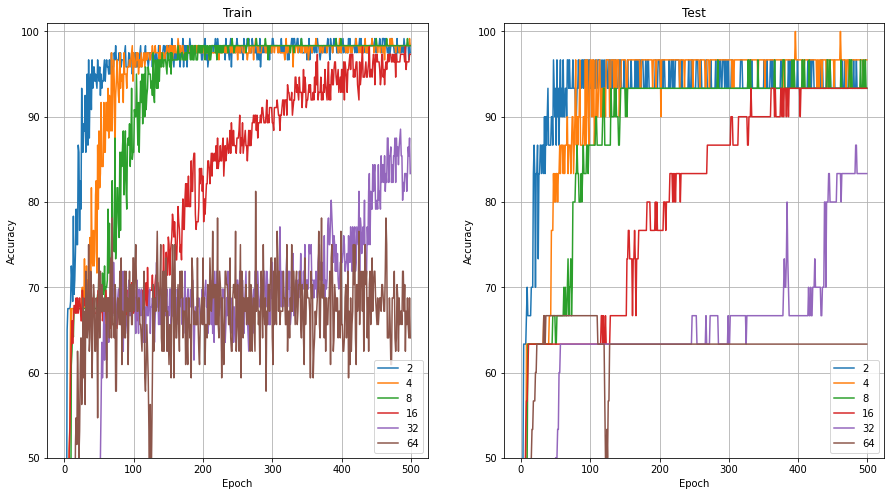

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,8))


ax[0].plot(AccuracyResultTrain)
ax[0].set_title('Train')
ax[1].plot(AccuracyResultTest)
ax[1].set_title('Test')


#common features

for i in range(2):
  ax[i].legend(batchsize)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy')
  ax[i].set_ylim([50,101])
  ax[i].grid()

plt.show()
